In this notebook, we will use SDSS DR15 data to recreate the star-galaxy classification implemented by Vasconcellos ea (2011).


# Part I

In Part I, we will implement embedding and dimensionality reduction techniques to explore any underlying structure and correlations in the given multi-dimensional data. We will attempt to do this with PCA first, then refine the approach by embedding the data into a 2D space using tSNE and visualizing the distribution.

For this application, we will use the Scikit-Learn implementation of tSNE. For a detailed description of the algorithm, and more complete info on tSNE please check the many online resources.


### Import the data

In [1]:
### import the following general purpose modules:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [10]:
# Read, then merge the two files together into a single Pandas df
dfG = pd.read_csv("Vasc2011_DR15_G12k_cleanv1.csv", skiprows = 1)
dfS = pd.read_csv("Vasc2011_DR15_S12k_cleanv1.csv", skiprows = 1)
frames = [dfG, dfS]
df = pd.concat(frames)

# Now shuffle the merged df
dfSG = df.sample(frac=1).reset_index(drop=True)

In [27]:
dfG

,objID,ra,dec,specObjID,psfMag_r,modelMag_r,petroMag_r,fiberMag_r,petroRad_r,petroR50_r,...,lnLStar_r,lnLExp_r,lnLDeV_r,mE1_r,mE2_r,mRrCc_r,type_r,type,class,class_person
0,1237645943979246090,57.141360,0.853471,1838718842986063872,20.83793,19.59637,19.69095,20.52687,2.922061,1.366723,...,-390.201900,-0.154786,-27.543850,0.146963,0.464884,18.001640,3,3,GALAXY,0
1,1237645943979246095,57.143277,1.031458,1838717743474436096,20.74754,19.45270,19.52465,20.43619,3.145139,1.485539,...,-463.162900,-8.163912,-64.479240,-0.089161,0.212525,19.187420,3,3,GALAXY,0
2,1237645943979311644,57.299811,0.877199,1838719667619784704,20.70706,19.72873,19.63919,20.54345,3.474878,1.425024,...,-270.458500,-4.067189,-6.591977,-0.509607,0.191383,12.405330,3,3,GALAXY,0
3,1237646587699921530,57.606098,0.843823,1838741108096526336,20.18135,19.08810,19.05892,19.91948,2.842889,1.350228,...,-733.019800,-21.083840,-29.501160,-0.062474,0.394681,12.291380,3,3,GALAXY,0
4,1237648702970528053,192.745123,-1.155455,328786439292610560,18.09817,16.92220,17.01622,18.21903,4.825194,2.060237,...,-8798.247000,-1561.470000,-270.341000,-0.276378,-0.414012,14.760910,3,3,GALAXY,0
5,1237648702970593413,192.775731,-1.113955,328787263926331392,19.04576,17.27871,17.26923,18.87824,6.115266,2.713363,...,-9271.076000,-73.117300,-577.223900,0.266925,0.793718,67.891010,3,3,GALAXY,0
6,1237648702970593457,192.843558,-1.112194,328788638315866112,18.31137,17.71813,17.77909,18.42288,2.363656,1.098342,...,-2453.257000,-137.613000,-13.326610,0.068135,0.087971,7.489682,3,3,GALAXY,0
7,1237648702970593481,192.863201,-1.050101,328788913193773056,17.89640,16.33003,16.46588,17.85322,5.704373,2.425934,...,-17693.140000,-2711.564000,-12.970450,-0.100207,0.125993,14.663050,3,3,GALAXY,0
8,1237648702970593667,192.751323,-1.094722,328786164414703616,20.05323,18.49020,18.45257,20.06327,9.522947,3.374253,...,-621.955300,-119.636400,-10.436600,0.111342,-0.032963,13.911430,3,3,GALAXY,0
9,1237648702970659002,192.955996,-1.187004,328774344664705024,18.46659,17.77814,17.82835,18.45745,2.772077,1.195706,...,-2335.595000,-290.464800,-7.971962,0.096447,-0.209491,7.524895,3,3,GALAXY,0


In [11]:
# Get the names of the cols in order to id the required data cols
df_colnames = dfSG.columns.values
for i in range(df_colnames.size):
  print('%d %s' % (i,df_colnames[i]))

0 objID
1 ra
2 dec
3 specObjID
4 psfMag_r
5 modelMag_r
6 petroMag_r
7 fiberMag_r
8 petroRad_r
9 petroR50_r
10 petroR90_r
11 lnLStar_r
12 lnLExp_r
13 lnLDeV_r
14 mE1_r
15 mE2_r
16 mRrCc_r
17 type_r
18 type
19 class
20 class_person


We will use col indices 4 to 16 (psfMag\_r .. mRrCc\_r) for the data (=features) and col 17, type_r for the labels.

In [12]:
# then cut out the features and labels as np arrays
data_cols = df_colnames[4:18].tolist()
print(data_cols)

# Also trim the df leaving only the required data cols
dfSG = dfSG.iloc[:,4:18]

['psfMag_r', 'modelMag_r', 'petroMag_r', 'fiberMag_r', 'petroRad_r', 'petroR50_r', 'petroR90_r', 'lnLStar_r', 'lnLExp_r', 'lnLDeV_r', 'mE1_r', 'mE2_r', 'mRrCc_r', 'type_r']


In [13]:
# CHECK FOR MISSING, NULL OR NAN DATA VALUES IN ANY OF THE COLUMNS
# dfSG[df_colnames[4:16]].isnull().sum()
dfSG.isnull().sum()

psfMag_r      0
modelMag_r    0
petroMag_r    0
fiberMag_r    0
petroRad_r    0
petroR50_r    0
petroR90_r    0
lnLStar_r     0
lnLExp_r      0
lnLDeV_r      0
mE1_r         0
mE2_r         0
mRrCc_r       0
type_r        0
dtype: int64

In [14]:
# We will also print out the first 5 rows to see what the data look like
print(dfSG.head(5))

   psfMag_r  modelMag_r  petroMag_r  fiberMag_r  petroRad_r  petroR50_r  \
0  18.59675    18.60012    18.65954    18.93216    1.051744    0.530026   
1  16.67866    14.87702    14.95749    16.84768   11.893990    5.032726   
2  21.49971    20.63964    20.66426    20.93259    2.822747    1.322111   
3  17.57569    17.57918    17.63128    17.91628    1.216070    0.617803   
4  16.20854    16.22578    16.28901    16.59538    1.299361    0.652433   

   petroR90_r     lnLStar_r      lnLExp_r     lnLDeV_r     mE1_r     mE2_r  \
0    1.197493     -0.260487     -0.321303    -0.320223 -0.118319 -0.056171   
1   12.906330 -60202.820000 -19631.520000 -4536.472000 -0.009286 -0.086545   
2    2.788998    -15.985390     -0.004260    -0.126990 -0.325491 -0.055316   
3    1.364082     -0.554733     -1.201368    -1.209462 -0.035741  0.008522   
4    1.516219    -31.219360    -34.277010   -34.300300 -0.096813 -0.083079   

     mRrCc_r  type_r  
0   2.047026       6  
1  15.734910       3  
2  14.85585

### Preprocess and visualize the data

We are now ready to explore the data. We will first try PCA, then implement tSNE. 

**NOTE** tSNE is computationally very demanding on the available resources. For illustration, we will time both the PCA and tSNE run times. For the sake of class time, we have implimented them on a fairly small dataset (25k) compared to the dataset used by Vasconcellos ea (2011).

Shape of labels:  (25000,)
Shape of features:  (25000, 13)
[3 6]


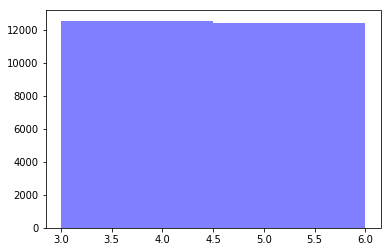

In [15]:
# SPLIT THE DATA FRAME INTO LABELS AND FEATURES
# CHECK THE SHAPE (SIZE) OF EACH
SG_labl = dfSG.type_r.values

SG_data = dfSG.drop(["type_r"], axis = 1).values
print('Shape of labels: ',SG_labl.shape)
print('Shape of features: ',SG_data.shape)


# Check the distributions of the types of objects
labl_val = np.unique(SG_labl)
print(labl_val)

num_bins = labl_val.size
plt.hist(SG_labl, num_bins, facecolor='blue', alpha=0.5, histtype='stepfilled')
plt.show()

Before running any algorithm, it is better to normalize all the features. This is especially important where the numerical values of the feaures, and their ranges differ significantly, as in the case of our dataset. We will use a built-in function in Scikit-Learn to accomplish this. 

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
SG_data_norm = sc.fit_transform(SG_data)

####Skip This

For the first pass we will skip this step. If time permits, we will revisit this to run tSNE as a supervised learing approach

In [17]:
# Split data into train and test data sets
# from sklearn.model_selection import train_test_split
# train_dat,test_dat,train_cls,test_cls = train_test_split(SG_data,SG_labl,test_size=.05,random_state=0)

# print(train_dat.shape)
# print(SG_data.shape)

### PCA

In [18]:
# Try PCA first
# also measure the processing time
from sklearn.decomposition import PCA
import timeit
tic=timeit.default_timer()
# Try all the available features
n_components=SG_data_norm.shape[1]

pca=PCA(n_components=n_components, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)
pca.fit(SG_data_norm)
SG_pca = pca.transform(SG_data_norm)
toc=timeit.default_timer()
exec_time = toc-tic
print('Exec time [s]: %.3f' % exec_time)

Exec time [s]: 0.045


In [22]:
explained_variance = pca.explained_variance_ratio_
print(", ".join('%.3f'% var for var in explained_variance))

0.334, 0.275, 0.219, 0.096, 0.048, 0.011, 0.007, 0.005, 0.004, 0.002, 0.000, 0.000, 0.000


As you can see, the first three components contain about 83% of the info, so the data compression is fairly good.

For completeness, let's visualize these PCA components in 2D and 3D.

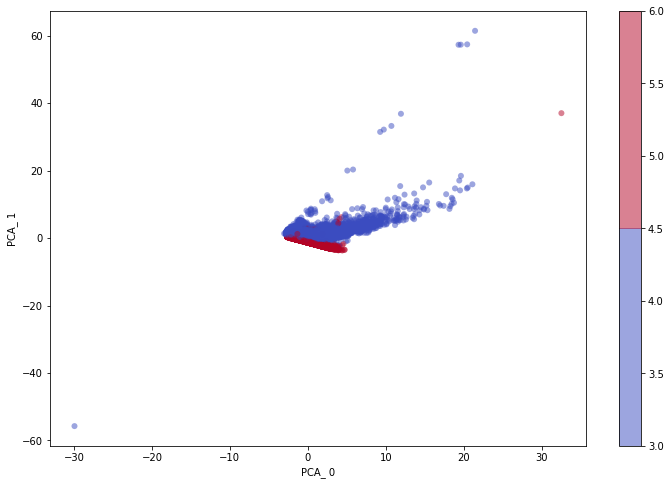

In [23]:
##  see the distribution of the examples on the some selected components
comX=0
comY=1

plt.figure(figsize=(12,8))
plt.scatter(SG_pca[:,comX], SG_pca[:,comY],
            c=SG_labl, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('coolwarm',(np.unique(SG_labl)).size))
plt.xlabel('PCA_ '+ str(comX))
plt.ylabel('PCA_ '+str(comY))
plt.colorbar();


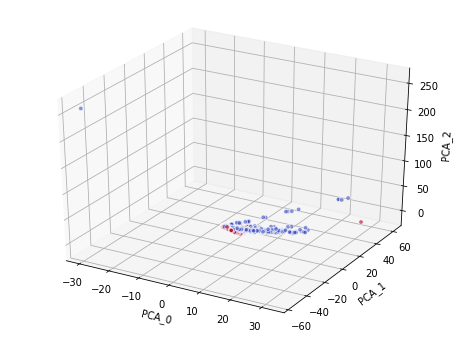

In [24]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

comX = 0
comY = 1
comZ = 2
xs = SG_pca[:,comX]
ys = SG_pca[:,comY]
zs = SG_pca[:,comZ]
# ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')
ax.scatter(xs, ys, zs,
            c=SG_labl, edgecolors='w', alpha=0.6,
            cmap=plt.cm.get_cmap('coolwarm',(np.unique(SG_labl)).size))

ax.set_xlabel('PCA_0')
ax.set_ylabel('PCA_1')
ax.set_zlabel('PCA_2')

plt.show()

#`## TSNE

Now, we are ready to compare the performance of tSNE. There are several hyperparameters to tune for this algorithm, and for the first trial, we will keep most of them at their default values (see code cell below)

We can choose the number of components to use. Let's try compressing down to 2 components, and see how well we can discriminate the two classes.

In [25]:
# class sklearn.manifold.TSNE(n_components=2, perplexity=30.0, 
# early_exaggeration=12.0, learning_rate=200.0, n_iter=1000, n_iter_without_progress=300, 
# min_grad_norm=1e-07, metric=’euclidean’, init=’random’, verbose=0, 
# random_state=None, method=’barnes_hut’, angle=0.5)[source]¶

In [26]:
# Run tSNE
from sklearn.manifold import TSNE
tic=timeit.default_timer()
tsne = TSNE(n_components=2,perplexity=50)
SG_tsne = tsne.fit_transform(SG_data_norm)
toc=timeit.default_timer()
exec_time = toc-tic
print(exec_time)

KeyboardInterrupt: 

In [ ]:
# Plot the 2 componsents of tSNE
comX=0
comY=1

plt.figure(figsize=(12,8))
plt.scatter(SG_tsne[:,comX], SG_tsne[:,comY],
            c=SG_labl, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('coolwarm',(np.unique(SG_labl)).size))

plt.xlabel('tSNE_ '+ str(comX))
plt.ylabel('tSNE_ '+str(comY))
plt.colorbar();

As you can see, tSNE has managed to segregate the two classes quite well. We can now use some simple distance measure to classify any new observations.